In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Visualisation de nos données

In [ ]:
x = np.linspace(-0, 20.0, 101)
noise = np.random.normal(0, 0.1, 101)
y = np.sin(2 * x + 0.5 * np.pi) + noise

plt.figure(figsize=(20, 10))
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("sin(x)")

# Initialisation des paramètres

In [ ]:
a = np.random.randn(1)[0]
k = 0.0
dictModel = {
    'a': a,
    'k': k
}

In [ ]:
a

# Algorithme de recherche

In [ ]:
def train(model, x_train, y_true, epochs=5, lr=0.1):
    all_errors = []
    for ep in range(epochs):
        ep_errors = []
        for i in range(len(x_train)):
            # Affichage
            print(f'\rÉpoque {ep+1} / {epochs} : {i+1} / {len(x_train)}', end='')
            
            # Copie des variables
            a = model['a']
            k = model['k']
            # Forward + calcul erreur
            y_pred = np.sin(a * x_train[i] + k * np.pi)
            error = pow((y_true[i] - y_pred), 2)
            
            # Suivi de l’erreur
            ep_errors.append(error)
            
            # MaJ paramètres
            model['a'] = a - lr * 2 * (y_pred - y_true[i]) * x_train[i] * np.cos(a * x_train[i] + k * np.pi)
            model['k'] = k - lr * 2 * (y_pred - y_true[i]) * np.pi * np.cos(a * x_train[i] + k * np.pi)
            
        all_errors.append(np.hstack(ep_errors).mean())
    return all_errors

In [ ]:
epochs = 500
lr = 0.01

hist = train(dictModel, x, y, epochs=epochs, lr=lr)

plt.figure(figsize=(20, 10))
plt.plot(np.arange(1, epochs+1), hist)
plt.xlabel('Époque')
plt.ylabel('Erreur')

In [ ]:
y_pred = np.sin(dictModel['a'] * x + dictModel['k'] * np.pi)

plt.figure(figsize=(20, 10))
plt.plot(x, y_pred, c='b', label="Prédiction")
plt.scatter(x, y, c='r', label="True")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

print(f"Modèle : {dictModel['a']} \t | \t Vrai : 2\nModèle : {dictModel['k']} \t | \t Vrai : 0.5")

# En PyTorch

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader

Text(0, 0.5, 'sin(x)')

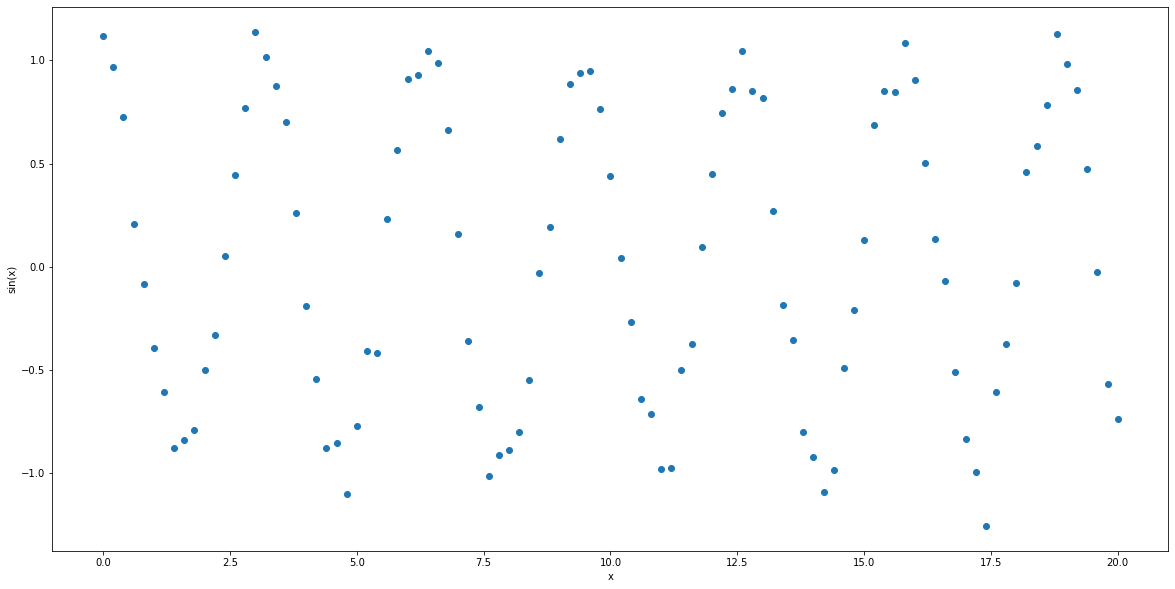

In [3]:
x = torch.linspace(-0, 20.0, 101)
noise = np.random.normal(0, 0.1, 101)
y = torch.sin(2 * x + 0.5 * np.pi) + noise

plt.figure(figsize=(20, 10))
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("sin(x)")

In [29]:
class SinDataset(Dataset):
    def __init__(self, x, y):
        super(SinDataset, self).__init__()
        self.x = x
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

class SinModel(torch.nn.Module):
    def __init__(self):
        super(SinModel, self).__init__()
        self.init_weights()
    
    def init_weights(self):
        self.a = torch.nn.Parameter(torch.randn(1))
        self.k = torch.nn.Parameter(torch.zeros(1))
    
    def forward(self, x):
        return torch.sin(self.a * x + self.k * np.pi)

In [42]:
def train(model, optimizer, loss, train_loader, epochs=5):
    all_errors = []
    for ep in range(epochs):
        ep_errors = []
        for i, (example, label) in enumerate(train_loader):
            # Affichage
            print(f'\rÉpoque {ep+1} / {epochs} : {i+1} / {len(train_loader)}', end='')
            
            example = example.float()
            label = label.float()
            
            # Forward + calcul erreur
            y_pred = model(example)
            error = loss(y_pred, label)
            
            # MaJ paramètres
            error.backward()
            optimizer.step()
            
            # Suivi de l’erreur
            ep_errors.append(error.detach().numpy())
            
        all_errors.append(np.hstack(ep_errors).mean())
    return all_errors

In [49]:
dataset = SinDataset(x, y)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

epochs = 100
lr = 0.01

model = SinModel().float()
loss = torch.nn.MSELoss(reduction='mean')

optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [50]:
hist = train(model, optimizer, loss, dataloader, epochs=epochs)

Époque 100 / 100 : 101 / 101

Text(0, 0.5, 'Erreur')

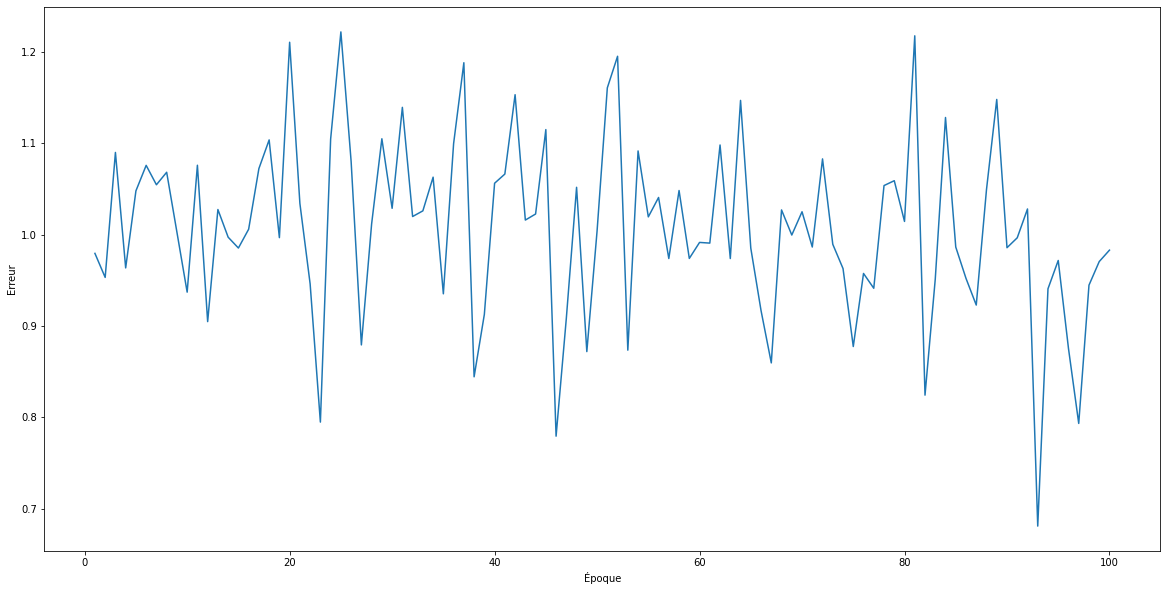

In [51]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(1, epochs+1), hist)
plt.xlabel('Époque')
plt.ylabel('Erreur')

Modèle : Parameter containing:
tensor([85353.7188], requires_grad=True) 	 | 	 Vrai : 2
Modèle : Parameter containing:
tensor([31428.5234], requires_grad=True) 	 | 	 Vrai : 0.5


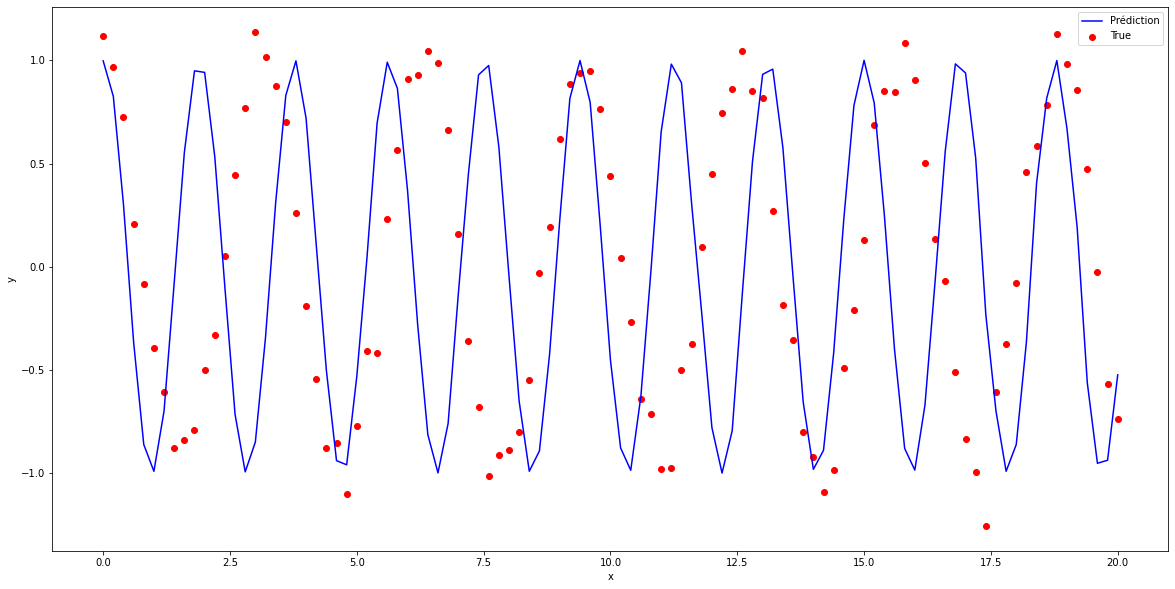

In [52]:
model.training = False
with torch.no_grad():
    y_pred = model(x)

plt.figure(figsize=(20, 10))
plt.plot(x, y_pred, c='b', label="Prédiction")
plt.scatter(x, y, c='r', label="True")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

print(f"Modèle : {model.a} \t | \t Vrai : 2\nModèle : {model.k} \t | \t Vrai : 0.5")